In [2]:
from prody import *
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tqdm
import re
import natsort
import seaborn as sns

In [ ]:
import mdtraj as md
import glob
import os

xtc_files = glob.glob(
    "Model_results/shuffle_not_allframes/*/*/fraction_40/generated_frac_40.xtc"
)

for xtc_path in xtc_files:
    
    parts = xtc_path.split('/')
    
    pdb_code = parts[2]   
    pdb_path = f"data/palantir_data/{pdb_code}/backbone.pdb"
    
    print(f"Converting: {xtc_path}")
    
    traj = md.load(xtc_path, top=pdb_path)
    
    
    dcd_path = xtc_path.replace(".xtc", ".dcd")
    
    traj.save_dcd(dcd_path)
    
    print(f"Saved: {dcd_path}\n")



Converting: Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_2/fraction_40/generated_frac_40.xtc
Saved: Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_2/fraction_40/generated_frac_40.dcd

Converting: Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_0/fraction_40/generated_frac_40.xtc
Saved: Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_0/fraction_40/generated_frac_40.dcd

Converting: Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_1/fraction_40/generated_frac_40.xtc
Saved: Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_1/fraction_40/generated_frac_40.dcd

Converting: Model_results/shuffle_not_allframes/pep_free/pep_free_rep_0/fraction_40/generated_frac_40.xtc
Saved: Model_results/shuffle_not_allframes/pep_free/pep_free_rep_0/fraction_40/generated_frac_40.dcd

Converting: Model_results/shuffle_not_allframes/pep_free/pep_free_rep_1/fraction_40/generated_frac_40.xtc
Saved: Model_results/shuffle_not_allframes/pep_free/pep_free_rep_1/fraction_40/generated_frac_40.dcd

Converti

In [ ]:
import glob
import pandas as pd

dcd_files = glob.glob(
    "Model_results/shuffle_not_allframes/*/*/fraction_40/generated_frac_40.dcd"
)

df_metadata = pd.DataFrame(columns=['path','pdb_code','replica','pdb_file'])

for i, fl in enumerate(dcd_files):

    parts = fl.split('/')

    pdb_code = parts[2]               
    replica_folder = parts[3]         

    replica = replica_folder.split('_')[-1]

    df_metadata.loc[i, 'path'] = fl
    df_metadata.loc[i, 'pdb_code'] = pdb_code
    df_metadata.loc[i, 'replica'] = replica


    pdb_path = f"data/palantir_data/{pdb_code}/backbone.pdb"
    df_metadata.loc[i, 'pdb_file'] = pdb_path

print(df_metadata)


                                                 path  pdb_code replica  \
0   Model_results/shuffle_not_allframes/3UTQ/3UTQ_...      3UTQ       2   
1   Model_results/shuffle_not_allframes/3UTQ/3UTQ_...      3UTQ       0   
2   Model_results/shuffle_not_allframes/3UTQ/3UTQ_...      3UTQ       1   
3   Model_results/shuffle_not_allframes/pep_free/p...  pep_free       0   
4   Model_results/shuffle_not_allframes/pep_free/p...  pep_free       1   
5   Model_results/shuffle_not_allframes/pep_free/p...  pep_free       2   
6   Model_results/shuffle_not_allframes/5N1Y/5N1Y_...      5N1Y       1   
7   Model_results/shuffle_not_allframes/5N1Y/5N1Y_...      5N1Y       0   
8   Model_results/shuffle_not_allframes/5N1Y/5N1Y_...      5N1Y       2   
9   Model_results/shuffle_not_allframes/5C0F/5C0F_...      5C0F       2   
10  Model_results/shuffle_not_allframes/5C0F/5C0F_...      5C0F       1   
11  Model_results/shuffle_not_allframes/5C0F/5C0F_...      5C0F       0   

                        

In [ ]:
for row in df_metadata.iterrows():
    print(row[1]['path'])
    !prody catdcd {row[1]['path']} -n

Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_2/fraction_40/generated_frac_40.dcd
876
Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_0/fraction_40/generated_frac_40.dcd
876
Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_1/fraction_40/generated_frac_40.dcd
876
Model_results/shuffle_not_allframes/pep_free/pep_free_rep_0/fraction_40/generated_frac_40.dcd
5001
Model_results/shuffle_not_allframes/pep_free/pep_free_rep_1/fraction_40/generated_frac_40.dcd
5001
Model_results/shuffle_not_allframes/pep_free/pep_free_rep_2/fraction_40/generated_frac_40.dcd
5001
Model_results/shuffle_not_allframes/5N1Y/5N1Y_rep_1/fraction_40/generated_frac_40.dcd
875
Model_results/shuffle_not_allframes/5N1Y/5N1Y_rep_0/fraction_40/generated_frac_40.dcd
875
Model_results/shuffle_not_allframes/5N1Y/5N1Y_rep_2/fraction_40/generated_frac_40.dcd
875
Model_results/shuffle_not_allframes/5C0F/5C0F_rep_2/fraction_40/generated_frac_40.dcd
1001
Model_results/shuffle_not_allframes/5C0F/5C0F_rep_1/fraction_40/generate

In [ ]:
import mdtraj as md


min_frames = min([
    md.load(row['path'], top=row['pdb_file']).n_frames
    for _, row in df_metadata.iterrows()
])

print("Global minimum frame:", min_frames)


Global minimum frame: 875


In [ ]:
for idx, row in df_metadata.iterrows():
    traj = md.load(row['path'], top=row['pdb_file'])
    traj = traj[:min_frames]
    traj.save_dcd(row['path'].replace(".dcd","_equalized.dcd"))


In [21]:
df_metadata['path'] = df_metadata['path'].str.replace(
    ".dcd", "_equalized.dcd", regex=False
)


In [23]:
for row in df_metadata.iterrows():
    print(row[1]['path'])
    !prody catdcd {row[1]['path']} -n

Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_2/fraction_40/generated_frac_40_equalized.dcd
875
Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_0/fraction_40/generated_frac_40_equalized.dcd
875
Model_results/shuffle_not_allframes/3UTQ/3UTQ_rep_1/fraction_40/generated_frac_40_equalized.dcd
875
Model_results/shuffle_not_allframes/pep_free/pep_free_rep_0/fraction_40/generated_frac_40_equalized.dcd
875
Model_results/shuffle_not_allframes/pep_free/pep_free_rep_1/fraction_40/generated_frac_40_equalized.dcd
875
Model_results/shuffle_not_allframes/pep_free/pep_free_rep_2/fraction_40/generated_frac_40_equalized.dcd
875
Model_results/shuffle_not_allframes/5N1Y/5N1Y_rep_1/fraction_40/generated_frac_40_equalized.dcd
875
Model_results/shuffle_not_allframes/5N1Y/5N1Y_rep_0/fraction_40/generated_frac_40_equalized.dcd
875
Model_results/shuffle_not_allframes/5N1Y/5N1Y_rep_2/fraction_40/generated_frac_40_equalized.dcd
875
Model_results/shuffle_not_allframes/5C0F/5C0F_rep_2/fraction_40/generated_fr

In [ ]:
def fix_chids(syst):
    resnums = syst.getResnums()
    chains = ['A','B','C']
    chain_tracker = 0
    prev_resnum = resnums[0]
    chain_ids = []

    for resnum in resnums:
       
        if resnum < prev_resnum:
            chain_tracker += 1
        
        chain_ids.append(chains[chain_tracker])
        prev_resnum = resnum

    syst.setChids(chain_ids)
    return syst


In [51]:
traj_dicts = dict()

for row in df_metadata.iterrows():
    
    traj = parseDCD(row[1]['path'])
    

    syst = parsePDB(row[1]['pdb_file'])
    
    syst = fix_chids(syst)
    
    writePDB(row[1]['pdb_file'].rstrip('.pdb')+'_chid_added.pdb',syst)
    
    traj.setAtoms(syst)
    traj.superpose()
    
    traj_dict = dict()
    traj_dict['traj'] = traj
    traj_dict['syst'] = syst
    
    # RMSD
    traj.setAtoms(syst.select('name CA'))
    rmsd = [calcRMSD(traj[0],traj[i]) for i in range(1,len(traj))]
    traj_dict['rmsd'] = rmsd
    
    # RMSF peptide
    traj.setAtoms(syst.select('name CA and chain A'))
    traj.superpose()

    traj.setAtoms(syst.select('name CA and chain C'))
    rmsf_pep = calcRMSF(traj)
    traj_dict['rmsf_pep'] = rmsf_pep
    
    # RMSF system
    traj.setAtoms(
        syst.select(
            'name CA and (chain A or chain B or chain C)'
        )
    )

    traj.superpose()
    rmsf = calcRMSF(traj)

    rmsf_resindices = traj.getAtoms().getResindices()

    traj_dict['rmsf'] = rmsf
    traj_dict['rmsf_resindices'] = rmsf_resindices


    
    traj_dicts[(row[1]['pdb_code'],row[1]['replica'])] = traj_dict


@> DCD file contains 875 coordinate sets for 1544 atoms.
@> DCD file was parsed in 0.00 seconds.
@> 15.48 MB parsed at input rate 3743.34 MB/s.
@> 875 coordinate sets parsed at input rate 211577 frame/s.
@> 1544 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Superposition completed in 0.18 seconds.
@> Superposition completed in 0.33 seconds.
@> Superposition completed in 0.17 seconds.
@> DCD file contains 875 coordinate sets for 1544 atoms.
@> DCD file was parsed in 0.00 seconds.
@> 15.48 MB parsed at input rate 3351.85 MB/s.
@> 875 coordinate sets parsed at input rate 189449 frame/s.
@> 1544 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> Superposition completed in 0.17 seconds.
@> Superposition completed in 0.19 seconds.
@> Superposition completed in 0.17 seconds.
@> DCD file contains 875 coordinate sets for 1544 atoms.
@> DCD file was parsed in 0.00 seconds.
@> 15.48 MB parsed at input rate 3792.54 MB/s.
@> 875 coordinate sets parsed at input rate 214357 frame/s.
@> 1

In [44]:
df_rmsd = pd.DataFrame()

for key in traj_dicts:
    traj_dict = traj_dicts[key]
    rmsd = traj_dict['rmsd']
    pdb_id = key[0]
    replica = key[1]
    frames = np.arange(0,len(rmsd))
    df_traj = pd.DataFrame({'pdb_id':pdb_id,'replica':replica,'frame': frames, 
                            'rmsd':rmsd})
    df_rmsd = pd.concat([df_rmsd,df_traj])

In [45]:
df_rmsd.to_csv('df_rmsd_pMHC.csv')

In [46]:
df_rmsf_pep = pd.DataFrame()

for key in traj_dicts:
    traj_dict = traj_dicts[key]
    rmsf_pep = traj_dict['rmsf_pep']
    pdb_id = key[0]
    if pdb_id == 'pep_free':
        continue
    replica = key[1]
    pep_pos = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']
    df_traj = pd.DataFrame({'pdb_id':pdb_id,'replica':replica, 'pep_pos': pep_pos, 'rmsf_pep':rmsf_pep})
    df_rmsf_pep = pd.concat([df_rmsf_pep,df_traj])

In [47]:
df_rmsf_pep.to_csv('df_rmsf_pep_pMHC.csv')

In [52]:
df_rmsf = pd.DataFrame()

for key in traj_dicts:
    traj_dict = traj_dicts[key]
    rmsf = traj_dict['rmsf']
    pdb_id = key[0]
    rmsf_resindices = traj_dict['rmsf_resindices']
    replica = key[1]
    df_traj = pd.DataFrame({'pdb_id':pdb_id,'replica':replica, 'resindex': rmsf_resindices, 'rmsf':rmsf})
    df_rmsf = pd.concat([df_rmsf,df_traj])

In [53]:
df_rmsf.to_csv('df_rmsf_pMHC.csv')

In [57]:
residue_sets = []

for key in traj_dicts:
    syst = traj_dicts[key]['syst']
    sel = syst.select('name CA and (chain A or chain B)')
    
    pairs = set(zip(sel.getChids(), sel.getResnums()))
    residue_sets.append(pairs)

common_pairs = set.intersection(*residue_sets)

print(len(common_pairs))


376


In [60]:
def select_common(syst, common_pairs):
    atoms = syst.select('name CA and (chain A or chain B)')
    
    indices = [
        atom.getIndex()
        for atom in atoms
        if (atom.getChid(), atom.getResnum()) in common_pairs
    ]
    
    return syst[indices]



In [ ]:
df_subspace_overlap = pd.DataFrame(
    columns=['pdb_code1','replica1','pdb_code2','replica2','subspace_overlap']
)

for key1 in tqdm.tqdm(traj_dicts):
    for key2 in traj_dicts:

        eda1 = EDA()
        traj1 = traj_dicts[key1]['traj']
        syst1 = traj_dicts[key1]['syst']

        sel1 = select_common(syst1, common_pairs)
        traj1.setAtoms(sel1)
        traj1 = traj1[50:]   
        traj1.superpose()

        eda1.buildCovariance(traj1)
        eda1.calcModes()

        eda2 = EDA()
        traj2 = traj_dicts[key2]['traj']
        syst2 = traj_dicts[key2]['syst']

        sel2 = select_common(syst2, common_pairs)
        traj2.setAtoms(sel2)
        traj2 = traj2[50:]
        traj2.superpose()

        eda2.buildCovariance(traj2)
        eda2.calcModes()

        so = calcSubspaceOverlap(eda1, eda2)

        df_subspace_overlap.loc[len(df_subspace_overlap)] = [
            key1[0], key1[1],
            key2[0], key2[1],
            so
        ]


@> Superposition completed in 0.21 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.763007s.
@> 20 modes were calculated in 0.07s.
@> Superposition completed in 0.21 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.795715s.
@> 20 modes were calculated in 0.07s.
@> Superposition completed in 0.22 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.776675s.
@> 20 modes were calculated in 0.07s.
@> Superposition completed in 0.22 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.806999s.
@> 20 modes were calculated in 0.07s.
@> Superposition completed in 0.53 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.748251s.
@> 20 modes were calculated in 0.07s.
@> Superposition completed in 0.17 seconds.
@> Covariance is calculated using 825 coo

In [62]:
df_subspace_overlap[
    (df_subspace_overlap.pdb_code1 == df_subspace_overlap.pdb_code2) &
    (df_subspace_overlap.replica1 == df_subspace_overlap.replica2)
]


,pdb_code1,replica1,pdb_code2,replica2,subspace_overlap
0,3UTQ,2,3UTQ,2,1.0
13,3UTQ,0,3UTQ,0,1.0
26,3UTQ,1,3UTQ,1,1.0
39,pep_free,0,pep_free,0,1.0
52,pep_free,1,pep_free,1,1.0
65,pep_free,2,pep_free,2,1.0
78,5N1Y,1,5N1Y,1,1.0
91,5N1Y,0,5N1Y,0,1.0
104,5N1Y,2,5N1Y,2,1.0
117,5C0F,2,5C0F,2,1.0


In [63]:
# Change column type to string for replica1 and replica2
df_subspace_overlap['replica1'] = df_subspace_overlap['replica1'].astype(str)
df_subspace_overlap['replica2'] = df_subspace_overlap['replica2'].astype(str)
df_subspace_overlap['pdb_code1_replica1'] = df_subspace_overlap['pdb_code1']+'_'+df_subspace_overlap['replica1']
df_subspace_overlap['pdb_code2_replica2'] = df_subspace_overlap['pdb_code2']+'_'+df_subspace_overlap['replica2']

In [64]:
df_subspace_overlap.to_csv('S1_subspace_overlap_pMHC.csv')

# RMSD graphs

In [71]:
matplotlib.rcParams['figure.constrained_layout.use'] = True
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['lines.linewidth'] = 2

In [3]:
df_rmsd = pd.read_csv('df_rmsd_pMHC.csv')

In [4]:
df_rmsd.head()

,Unnamed: 0,pdb_id,replica,frame,rmsd
0,0,3UTQ,2,0,2.459120
1,1,3UTQ,2,1,1.980500
2,2,3UTQ,2,2,1.372917
3,3,3UTQ,2,3,0.945445
4,4,3UTQ,2,4,1.610996


In [5]:
def plot_mean_std(df, col, ax, color, label, shade=True):
    mean_values = df.groupby('frame')[col].mean()
    mean_values.dropna(inplace=True)
    mean_values = mean_values.reindex(index=natsort.natsorted(mean_values.index))
    
    std_values = df.groupby('frame')[col].std()
    std_values.dropna(inplace=True)
    std_values = std_values.reindex(index=natsort.natsorted(std_values.index))
    
    if shade:
        ax.fill_between(mean_values.index,
                        mean_values-std_values,
                        mean_values+std_values,
                        color=color, alpha=0.3)
        
    ax.plot(mean_values.index, mean_values, color=color, label=label)


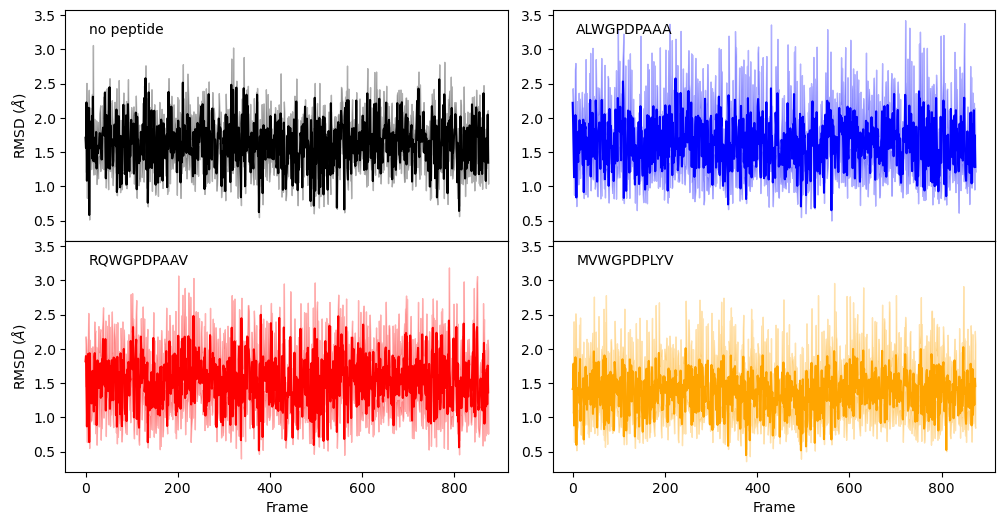

In [6]:
gs = plt.GridSpec(2,2, wspace=0.1, hspace=0, width_ratios=[50,50])

fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1],sharex=ax1,sharey=ax1) 
ax3=fig.add_subplot(gs[1,0],sharex=ax1,sharey=ax1)
ax4=fig.add_subplot(gs[1,1],sharex=ax1,sharey=ax1)

plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == 'pep_free'], 'rmsd', ax1, 'black', 'no peptide')
plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == '3UTQ'], 'rmsd', ax2, 'blue', 'ALWGPDPAAA')
plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == '5C0F'], 'rmsd', ax3, 'red', 'RQWGPDPAAV')
plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == '5N1Y'], 'rmsd', ax4, 'orange', 'MVWGPDPLYV')

ax1.legend(loc='upper left', frameon=False, handlelength=0)
ax2.legend(loc='upper left', frameon=False, handlelength=0)
ax3.legend(loc='upper left', frameon=False, handlelength=0)
ax4.legend(loc='upper left', frameon=False, handlelength=0)
ax1.set_ylabel('RMSD ($\AA$)')
ax3.set_ylabel('RMSD ($\AA$)')
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlabel('Frame')

plt.show()


In [ ]:
df_rmsd['rmsd_delta'] = df_rmsd.groupby(['pdb_id','replica'])['rmsd'] \
    .transform(lambda x: x - x.iloc[0])


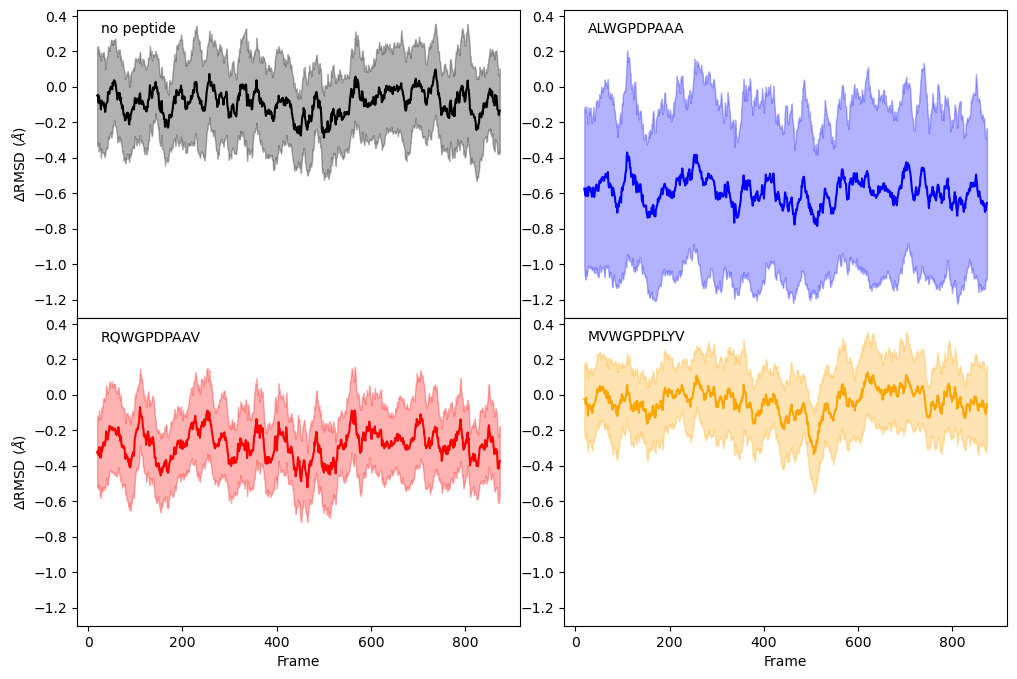

In [17]:
gs = plt.GridSpec(2,2, wspace=0.1, hspace=0, width_ratios=[50,50])

fig=plt.figure(figsize=(12,8))

ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1],sharex=ax1,sharey=ax1) 
ax3=fig.add_subplot(gs[1,0],sharex=ax1,sharey=ax1)
ax4=fig.add_subplot(gs[1,1],sharex=ax1,sharey=ax1)

plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == 'pep_free'], 'rmsd_delta', ax1, 'black', 'no peptide')
plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == '3UTQ'], 'rmsd_delta', ax2, 'blue', 'ALWGPDPAAA')
plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == '5C0F'], 'rmsd_delta', ax3, 'red', 'RQWGPDPAAV')
plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == '5N1Y'], 'rmsd_delta', ax4, 'orange', 'MVWGPDPLYV')

ax1.legend(loc='upper left', frameon=False, handlelength=0)
ax2.legend(loc='upper left', frameon=False, handlelength=0)
ax3.legend(loc='upper left', frameon=False, handlelength=0)
ax4.legend(loc='upper left', frameon=False, handlelength=0)
ax1.set_ylabel('ΔRMSD ($\AA$)')
ax3.set_ylabel('ΔRMSD ($\AA$)')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlabel('Frame')

plt.show()

In [18]:
df_rmsd['rmsd_norm'] = df_rmsd.groupby(['pdb_id','replica'])['rmsd'] \
    .transform(lambda x: (x - x.mean()) / x.std())


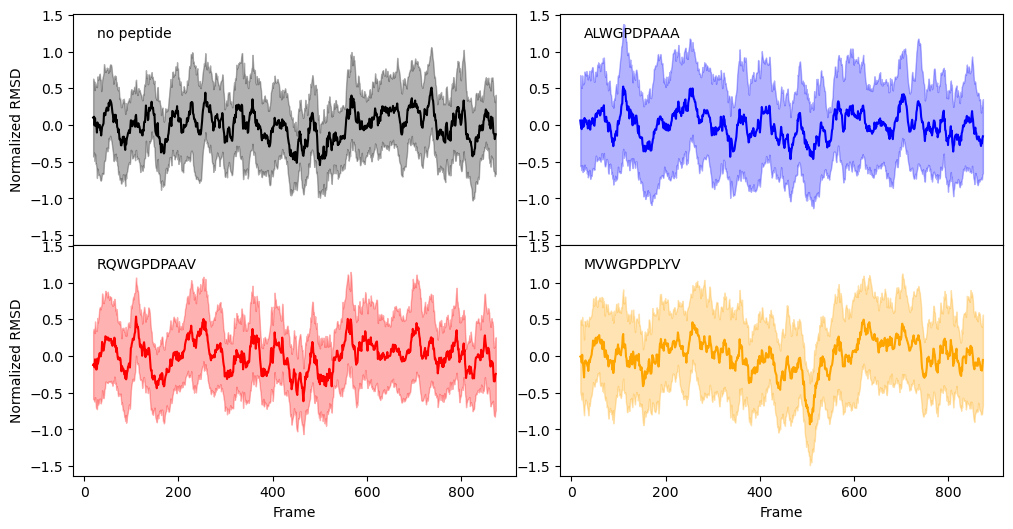

In [19]:
gs = plt.GridSpec(2,2, wspace=0.1, hspace=0, width_ratios=[50,50])

fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1],sharex=ax1,sharey=ax1) 
ax3=fig.add_subplot(gs[1,0],sharex=ax1,sharey=ax1)
ax4=fig.add_subplot(gs[1,1],sharex=ax1,sharey=ax1)

plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == 'pep_free'], 'rmsd_norm', ax1, 'black', 'no peptide')
plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == '3UTQ'], 'rmsd_norm', ax2, 'blue', 'ALWGPDPAAA')
plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == '5C0F'], 'rmsd_norm', ax3, 'red', 'RQWGPDPAAV')
plot_mean_std(df_rmsd[df_rmsd['pdb_id'] == '5N1Y'], 'rmsd_norm', ax4, 'orange', 'MVWGPDPLYV')

ax1.legend(loc='upper left', frameon=False, handlelength=0)
ax2.legend(loc='upper left', frameon=False, handlelength=0)
ax3.legend(loc='upper left', frameon=False, handlelength=0)
ax4.legend(loc='upper left', frameon=False, handlelength=0)
ax1.set_ylabel('Normalized RMSD')
ax3.set_ylabel('Normalized RMSD')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlabel('Frame')

plt.show()


In [22]:
def plot_mean_std_new(df, col, ax, color, label, shade=True, smooth=20):
    mean_values = df.groupby('frame')[col].mean()
    mean_values = mean_values.rolling(smooth).mean()

    std_values = df.groupby('frame')[col].std()
    std_values = std_values.rolling(smooth).mean()

    if shade:
        ax.fill_between(mean_values.index,
                        mean_values-std_values,
                        mean_values+std_values,
                        color=color, alpha=0.3)

    ax.plot(mean_values.index, mean_values, color=color, label=label)


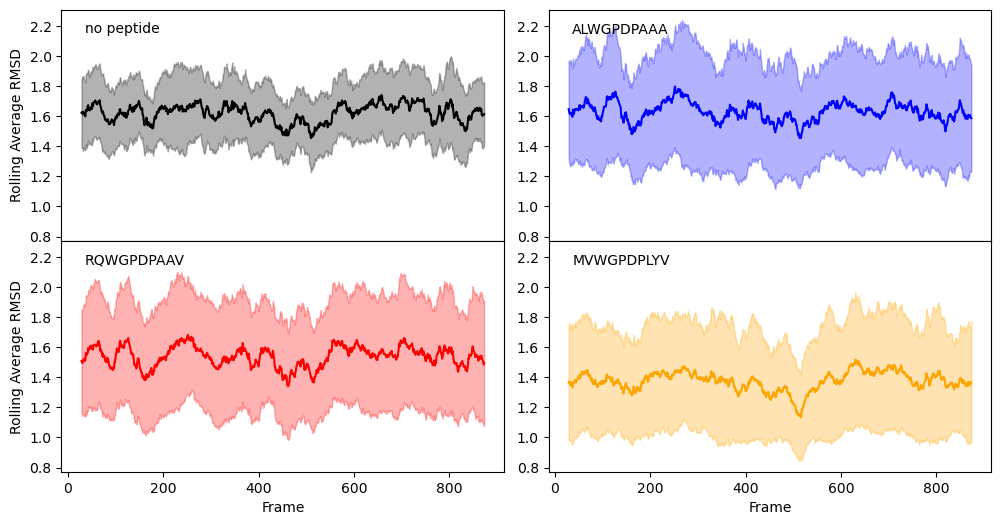

In [28]:
gs = plt.GridSpec(2,2, wspace=0.1, hspace=0, width_ratios=[50,50])

fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1],sharex=ax1,sharey=ax1) 
ax3=fig.add_subplot(gs[1,0],sharex=ax1,sharey=ax1)
ax4=fig.add_subplot(gs[1,1],sharex=ax1,sharey=ax1)

plot_mean_std_new(df_rmsd[df_rmsd['pdb_id'] == 'pep_free'], 'rmsd', ax1, 'black', 'no peptide',smooth=30)
plot_mean_std_new(df_rmsd[df_rmsd['pdb_id'] == '3UTQ'], 'rmsd', ax2, 'blue', 'ALWGPDPAAA', smooth=30)
plot_mean_std_new(df_rmsd[df_rmsd['pdb_id'] == '5C0F'], 'rmsd', ax3, 'red', 'RQWGPDPAAV',smooth=30)
plot_mean_std_new(df_rmsd[df_rmsd['pdb_id'] == '5N1Y'], 'rmsd', ax4, 'orange', 'MVWGPDPLYV',smooth=30)

ax1.legend(loc='upper left', frameon=False, handlelength=0)
ax2.legend(loc='upper left', frameon=False, handlelength=0)
ax3.legend(loc='upper left', frameon=False, handlelength=0)
ax4.legend(loc='upper left', frameon=False, handlelength=0)
ax1.set_ylabel('Rolling Average RMSD')
ax3.set_ylabel('Rolling Average RMSD')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlabel('Frame')

plt.show()

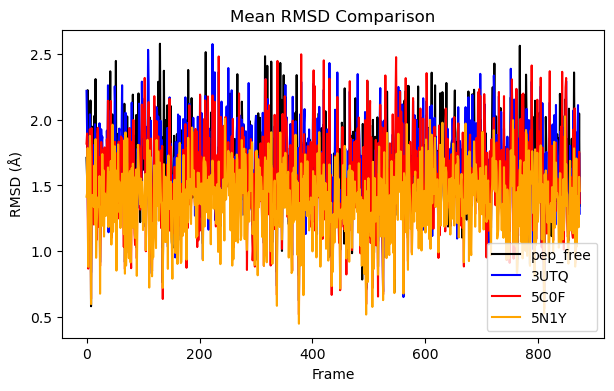

In [26]:
plt.figure(figsize=(7,4))

for pdb_id, color in [
    ('pep_free','black'),
    ('3UTQ','blue'),
    ('5C0F','red'),
    ('5N1Y','orange')
]:
    mean_values = df_rmsd[df_rmsd['pdb_id']==pdb_id] \
        .groupby('frame')['rmsd'].mean()

    plt.plot(mean_values, color=color, label=pdb_id)

plt.legend()
plt.ylabel("RMSD (Å)")
plt.xlabel("Frame")
plt.title("Mean RMSD Comparison")
plt.show()


# RMSF peptides

In [78]:
df_rmsf_pep = pd.read_csv('df_rmsf_pep_pMHC.csv')

In [79]:
df_rmsf_pep

,Unnamed: 0,pdb_id,replica,pep_pos,rmsf_pep
0,0,3UTQ,2,P1,0.538634
1,1,3UTQ,2,P2,0.470171
2,2,3UTQ,2,P3,0.528806
3,3,3UTQ,2,P4,0.568512
4,4,3UTQ,2,P5,0.655535
...,...,...,...,...,...
85,5,5C0F,0,P6,0.697282
86,6,5C0F,0,P7,0.596407
87,7,5C0F,0,P8,0.701951
88,8,5C0F,0,P9,0.698006


/tmp/ipykernel_1805906/4005911272.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10'])


Text(0.5, 0, 'Peptide position')

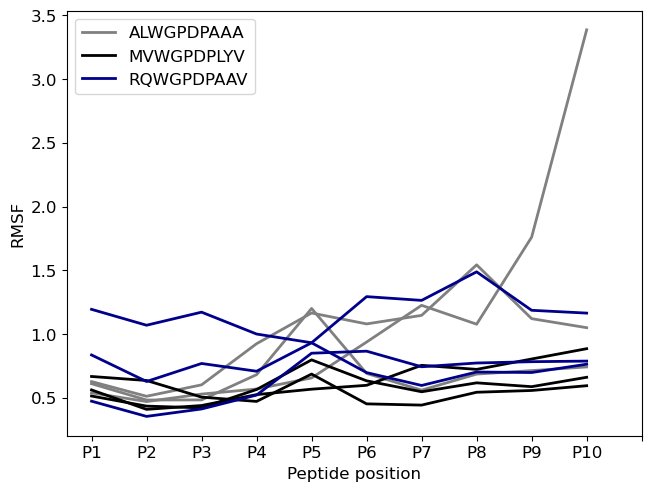

In [80]:
plt.plot(df_rmsf_pep.query("pdb_id == '3UTQ' & replica == 0")['rmsf_pep'].values, color='gray', label='ALWGPDPAAA')
plt.plot(df_rmsf_pep.query("pdb_id == '3UTQ' & replica == 1")['rmsf_pep'].values, color='gray')
plt.plot(df_rmsf_pep.query("pdb_id == '3UTQ' & replica == 2")['rmsf_pep'].values, color='gray')
plt.plot(df_rmsf_pep.query("pdb_id == '5N1Y' & replica == 0")['rmsf_pep'].values, color='black', label='MVWGPDPLYV')
plt.plot(df_rmsf_pep.query("pdb_id == '5N1Y' & replica == 1")['rmsf_pep'].values, color='black')
plt.plot(df_rmsf_pep.query("pdb_id == '5N1Y' & replica == 2")['rmsf_pep'].values, color='black')
plt.plot(df_rmsf_pep.query("pdb_id == '5C0F' & replica == 0")['rmsf_pep'].values, color='darkblue', label='RQWGPDPAAV')
plt.plot(df_rmsf_pep.query("pdb_id == '5C0F' & replica == 1")['rmsf_pep'].values, color='darkblue')
plt.plot(df_rmsf_pep.query("pdb_id == '5C0F' & replica == 2")['rmsf_pep'].values, color='darkblue')
plt.legend()
ax = plt.gca()
ax.set_xticklabels(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10'])
ax.set_xticks(np.arange(0,11,1))
ax.set_ylabel('RMSF')
ax.set_xlabel('Peptide position')

# RMSF

In [29]:
df_rmsf = pd.read_csv('df_rmsf_pMHC.csv')
df_rmsf.head()

,Unnamed: 0,pdb_id,replica,resindex,rmsf
0,0,3UTQ,2,0,1.295740
1,1,3UTQ,2,1,1.066904
2,2,3UTQ,2,2,0.870594
3,3,3UTQ,2,3,0.694615
4,4,3UTQ,2,4,0.605522


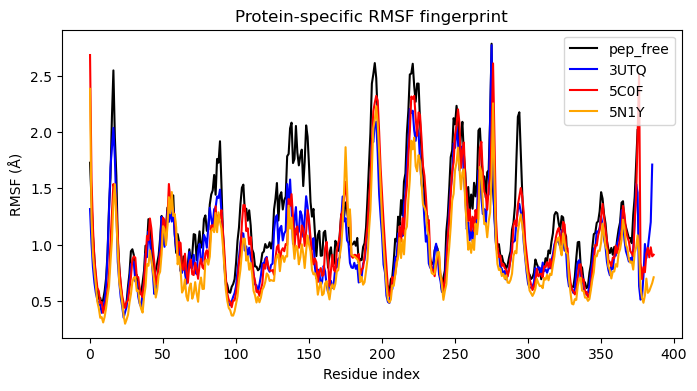

In [30]:
plt.figure(figsize=(8,4))

for pdb_id, color in [
    ('pep_free','black'),
    ('3UTQ','blue'),
    ('5C0F','red'),
    ('5N1Y','orange')
]:
    mean_rmsf = df_rmsf[df_rmsf['pdb_id']==pdb_id] \
        .groupby('resindex')['rmsf'].mean()

    plt.plot(mean_rmsf.values, color=color, label=pdb_id)

plt.legend()
plt.xlabel("Residue index")
plt.ylabel("RMSF (Å)")
plt.title("Protein-specific RMSF fingerprint")
plt.show()


In [82]:
def plot_mean_std_rmsf(df, col, ax, color, label, shade=True):
    mean_values = df.groupby('resindex')[col].mean()
    mean_values.dropna(inplace=True)
    mean_values = mean_values.reindex(index=natsort.natsorted(mean_values.index))
    std_values = df.groupby('resindex')[col].std()
    std_values.dropna(inplace=True)
    std_values = std_values.reindex(index=natsort.natsorted(std_values.index))
    if shade:
        ax.fill_between(mean_values.index, mean_values-std_values, mean_values+std_values, color=color, alpha=0.3)
        
    ax.plot(mean_values.index, mean_values, color=color, label=label)
    ax.plot([180,180],[0,6],linestyle='--',linewidth=1,color='black')
    ax.plot([274,274],[0,6],linestyle='--',linewidth=1,color='black')
    #ax.set_xticks(mean_values.index[::40])
    #ax.set_xticklabels([round(x) for x in mean_values.index[::40]*750/375], rotation=45)
    #ax.set_title(label)

/home/dilara/miniconda3/envs/mhc_dynamics_dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


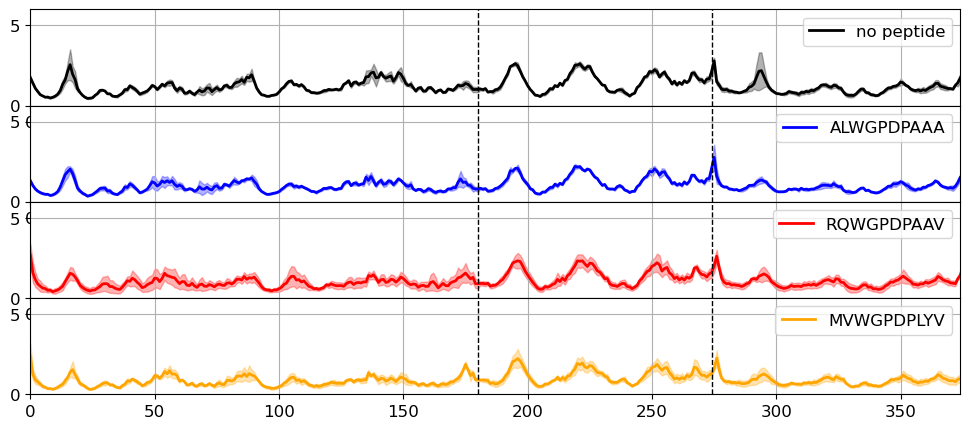

/tmp/ipykernel_1805906/258485375.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [83]:
gs = plt.GridSpec(4,1, wspace=0.1, hspace=0, height_ratios=[25,25,25,25])

fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(gs[0,0])
ax1.grid() 
ax2=fig.add_subplot(gs[1,0],sharex=ax1,sharey=ax1)
ax2.grid() 
ax3=fig.add_subplot(gs[2,0],sharex=ax1,sharey=ax1)
ax3.grid()
ax4=fig.add_subplot(gs[3,0],sharex=ax1,sharey=ax1)
ax4.grid()
axes = [ax1,ax2,ax3,ax4]
plot_mean_std_rmsf(df_rmsf[df_rmsf['pdb_id'] == 'pep_free'], 'rmsf', ax1, 'black', 'no peptide')
plot_mean_std_rmsf(df_rmsf[df_rmsf['pdb_id'] == '3UTQ'], 'rmsf', ax2, 'blue', 'ALWGPDPAAA')
plot_mean_std_rmsf(df_rmsf[df_rmsf['pdb_id'] == '5C0F'], 'rmsf', ax3, 'red', 'RQWGPDPAAV')
plot_mean_std_rmsf(df_rmsf[df_rmsf['pdb_id'] == '5N1Y'], 'rmsf', ax4, 'orange', 'MVWGPDPLYV')
for ax in axes:
    ax.set_xlim([0,374])
    ax.set_ylim([0,6])
    ax.legend(loc='best')

plt.show()
plt.tight_layout()

# RMSIP

In [87]:
df_subspace_overlap = pd.read_csv('S1_subspace_overlap_pMHC.csv')

In [88]:
df_subspace_overlap

,Unnamed: 0,pdb_code1,replica1,pdb_code2,replica2,subspace_overlap,pdb_code1_replica1,pdb_code2_replica2
0,0,3UTQ,2,3UTQ,2,1.000000,3UTQ_2,3UTQ_2
1,1,3UTQ,2,3UTQ,0,0.594217,3UTQ_2,3UTQ_0
2,2,3UTQ,2,3UTQ,1,0.611288,3UTQ_2,3UTQ_1
3,3,3UTQ,2,pep_free,0,0.433136,3UTQ_2,pep_free_0
4,4,3UTQ,2,pep_free,1,0.448005,3UTQ_2,pep_free_1
...,...,...,...,...,...,...,...,...
139,139,5C0F,0,5N1Y,0,0.454483,5C0F_0,5N1Y_0
140,140,5C0F,0,5N1Y,2,0.451262,5C0F_0,5N1Y_2
141,141,5C0F,0,5C0F,2,0.638937,5C0F_0,5C0F_2
142,142,5C0F,0,5C0F,1,0.607554,5C0F_0,5C0F_1


In [89]:

df_subspace_overlap.loc[df_subspace_overlap['pdb_code1_replica1'].str.contains('3UTQ'),'Peptide_1'] = 'ALWGPDPAAA'
df_subspace_overlap.loc[df_subspace_overlap['pdb_code2_replica2'].str.contains('3UTQ'),'Peptide_2'] = 'ALWGPDPAAA'
df_subspace_overlap.loc[df_subspace_overlap['pdb_code1_replica1'].str.contains('5N1Y'),'Peptide_1'] = 'MVWGPDPLYV'
df_subspace_overlap.loc[df_subspace_overlap['pdb_code2_replica2'].str.contains('5N1Y'),'Peptide_2'] = 'MVWGPDPLYV'
df_subspace_overlap.loc[df_subspace_overlap['pdb_code1_replica1'].str.contains('5C0F'),'Peptide_1'] = 'RQWGPDPAAV'
df_subspace_overlap.loc[df_subspace_overlap['pdb_code2_replica2'].str.contains('5C0F'),'Peptide_2'] = 'RQWGPDPAAV'
df_subspace_overlap.loc[df_subspace_overlap['pdb_code1_replica1'].str.contains('pep_free'),'Peptide_1'] = 'no peptide'
df_subspace_overlap.loc[df_subspace_overlap['pdb_code2_replica2'].str.contains('pep_free'),'Peptide_2'] = 'no peptide'

In [90]:
df_subspace_overlap

,Unnamed: 0,pdb_code1,replica1,pdb_code2,replica2,subspace_overlap,pdb_code1_replica1,pdb_code2_replica2,Peptide_1,Peptide_2
0,0,3UTQ,2,3UTQ,2,1.000000,3UTQ_2,3UTQ_2,ALWGPDPAAA,ALWGPDPAAA
1,1,3UTQ,2,3UTQ,0,0.594217,3UTQ_2,3UTQ_0,ALWGPDPAAA,ALWGPDPAAA
2,2,3UTQ,2,3UTQ,1,0.611288,3UTQ_2,3UTQ_1,ALWGPDPAAA,ALWGPDPAAA
3,3,3UTQ,2,pep_free,0,0.433136,3UTQ_2,pep_free_0,ALWGPDPAAA,no peptide
4,4,3UTQ,2,pep_free,1,0.448005,3UTQ_2,pep_free_1,ALWGPDPAAA,no peptide
...,...,...,...,...,...,...,...,...,...,...
139,139,5C0F,0,5N1Y,0,0.454483,5C0F_0,5N1Y_0,RQWGPDPAAV,MVWGPDPLYV
140,140,5C0F,0,5N1Y,2,0.451262,5C0F_0,5N1Y_2,RQWGPDPAAV,MVWGPDPLYV
141,141,5C0F,0,5C0F,2,0.638937,5C0F_0,5C0F_2,RQWGPDPAAV,RQWGPDPAAV
142,142,5C0F,0,5C0F,1,0.607554,5C0F_0,5C0F_1,RQWGPDPAAV,RQWGPDPAAV


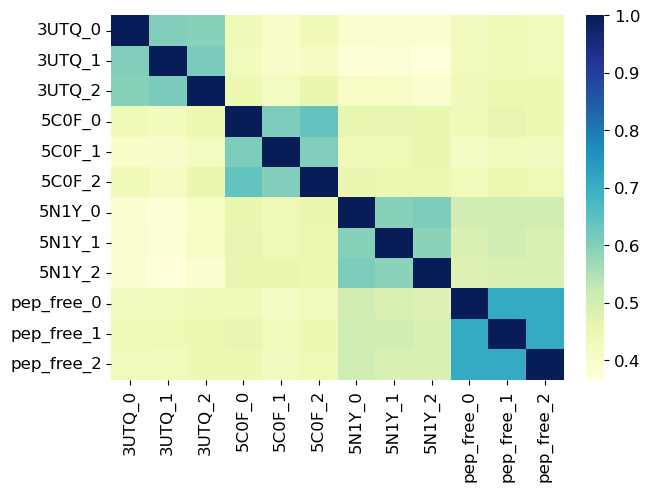

In [91]:
# Plot a heatmap of subspace_overlap values

import seaborn as sns

sns.heatmap(df_subspace_overlap.pivot(index='pdb_code1_replica1',columns='pdb_code2_replica2',values='subspace_overlap').fillna(0), cmap="YlGnBu")
plt.xlabel('')
plt.ylabel('')
plt.show()

In [101]:
for key in traj_dicts:
    eda = EDA()
    traj = traj_dicts[key]['traj']
    syst = traj_dicts[key]['syst']
    
    sel = select_common(syst, common_pairs)
    traj.setAtoms(sel)
    traj = traj[50:]
    traj.superpose()
    
    eda.buildCovariance(traj)
    eda.calcModes()
    
    writeNMD(f"{key[0]}_{key[1]}.nmd", eda, traj.getAtoms())



@> Superposition completed in 0.17 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.813104s.
@> 20 modes were calculated in 0.07s.
@> Superposition completed in 0.16 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.831608s.
@> 20 modes were calculated in 0.07s.
@> Superposition completed in 0.19 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.789286s.
@> 20 modes were calculated in 0.07s.
@> Superposition completed in 0.21 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.760128s.
@> 20 modes were calculated in 0.06s.
@> Superposition completed in 0.18 seconds.
@> Covariance is calculated using 825 coordinate sets.
@> Covariance matrix calculated in 0.803962s.
@> 20 modes were calculated in 0.07s.
@> Superposition completed in 0.20 seconds.
@> Covariance is calculated using 825 coo

In [103]:
nmd_files = glob.glob('*.nmd')

eda_list = list()

for nmd_file in nmd_files:
    matches = re.search('(.*)_(.*).nmd',nmd_file)
    pdb_code = matches.groups()[0]
    repeat = matches.groups()[1]
    eda = parseNMD(nmd_file)
    cc = calcCrossCorr(eda[0])
    eda_list.append([pdb_code,repeat,cc,eda])

@> WARNING Blank data associated with label 'segnames'.
@> WARNING The data label 'resnums' was not found in '5C0F_2.nmd'.
@> WARNING The data label 'segments' was not found in '5C0F_2.nmd'.
@> WARNING Blank data associated with label 'segnames'.
@> WARNING The data label 'resnums' was not found in 'pep_free_0.nmd'.
@> WARNING The data label 'segments' was not found in 'pep_free_0.nmd'.
@> WARNING Blank data associated with label 'segnames'.
@> WARNING The data label 'resnums' was not found in '5C0F_0.nmd'.
@> WARNING The data label 'segments' was not found in '5C0F_0.nmd'.
@> WARNING Blank data associated with label 'segnames'.
@> WARNING The data label 'resnums' was not found in '3UTQ_1.nmd'.
@> WARNING The data label 'segments' was not found in '3UTQ_1.nmd'.
@> WARNING Blank data associated with label 'segnames'.
@> WARNING The data label 'resnums' was not found in '3UTQ_0.nmd'.
@> WARNING The data label 'segments' was not found in '3UTQ_0.nmd'.
@> WARNING Blank data associated with

In [104]:
df_eda = pd.DataFrame(eda_list, columns = ['pdb','repeat','cc','eda'])

In [105]:
df_eda.head(10)

,pdb,repeat,cc,eda
0,5C0F,2,"[[0.9999999999999998, 0.7517978991293951, 0.68...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."
1,pep_free,0,"[[0.9999999999999999, 0.9593863841459628, 0.92...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."
2,5C0F,0,"[[1.0, 0.8607973921100399, 0.7384194122763904,...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."
3,3UTQ,1,"[[1.0000000000000002, 0.8839024720357025, 0.82...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."
4,3UTQ,0,"[[0.9999999999999999, 0.8856830539202721, 0.76...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."
5,pep_free,2,"[[1.0, 0.9591484953564817, 0.9445163512088076,...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."
6,5N1Y,1,"[[1.0, 0.7686974168080113, 0.6711891934874225,...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."
7,3UTQ,2,"[[0.9999999999999999, 0.8937607741128641, 0.80...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."
8,5N1Y,0,"[[1.0000000000000002, 0.8121883738232573, 0.80...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."
9,5N1Y,2,"[[1.0000000000000002, 0.5825225357810612, 0.52...","((Mode 1 from NMA Unknown, Mode 2 from NMA Unk..."


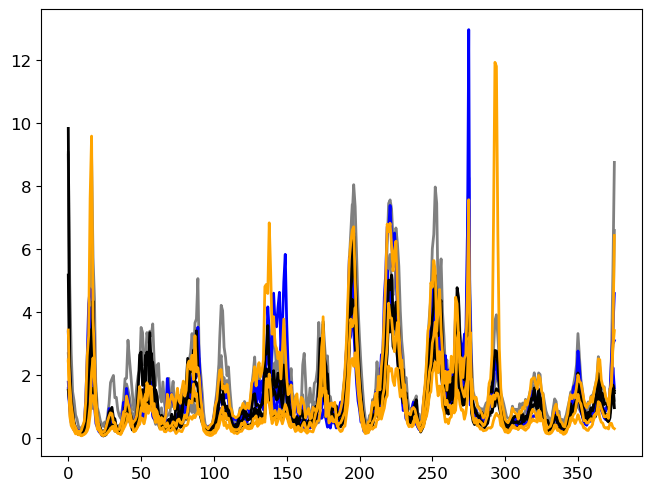

In [106]:
plt.plot(calcSqFlucts(df_eda.loc[0,'eda'][0]),color='gray')
plt.plot(calcSqFlucts(df_eda.loc[1,'eda'][0]),color='gray')
plt.plot(calcSqFlucts(df_eda.loc[2,'eda'][0]),color='gray')
plt.plot(calcSqFlucts(df_eda.loc[3,'eda'][0]),color='blue')
plt.plot(calcSqFlucts(df_eda.loc[4,'eda'][0]),color='blue')
plt.plot(calcSqFlucts(df_eda.loc[5,'eda'][0]),color='blue')
plt.plot(calcSqFlucts(df_eda.loc[6,'eda'][0]),color='black')
plt.plot(calcSqFlucts(df_eda.loc[7,'eda'][0]),color='black')
plt.plot(calcSqFlucts(df_eda.loc[8,'eda'][0]),color='black')
plt.plot(calcSqFlucts(df_eda.loc[9,'eda'][0]),color='orange')
plt.plot(calcSqFlucts(df_eda.loc[10,'eda'][0]),color='orange')
plt.plot(calcSqFlucts(df_eda.loc[11,'eda'][0]),color='orange')


In [107]:
pdb_codes = df_eda['pdb'].unique()

mean_cc_dict = dict()
for pdb_code in pdb_codes:
    df_eda_pdb = df_eda[df_eda['pdb'] == pdb_code]
    mean_cc = np.mean(df_eda_pdb['cc'])
    mean_cc_dict[pdb_code] = mean_cc
    for j in range(0,len(df_eda_pdb)):
        df_eda_pdb_repeat = df_eda_pdb[df_eda_pdb['repeat'] == str(j)]
        fv = calcFractVariance(df_eda_pdb_repeat['eda'].values[0][0])
        for i in range(0,len(fv)):
            df_eda.loc[df_eda_pdb_repeat.index,f'fv_{i}'] = fv[i]

@> WARNING Total variance for NMA Unknown is calculated using 20 available modes out of 1128 possible.
@> WARNING Total variance for NMA Unknown is calculated using 20 available modes out of 1128 possible.
@> WARNING Total variance for NMA Unknown is calculated using 20 available modes out of 1128 possible.
@> WARNING Total variance for NMA Unknown is calculated using 20 available modes out of 1128 possible.
@> WARNING Total variance for NMA Unknown is calculated using 20 available modes out of 1128 possible.
@> WARNING Total variance for NMA Unknown is calculated using 20 available modes out of 1128 possible.
@> WARNING Total variance for NMA Unknown is calculated using 20 available modes out of 1128 possible.
@> WARNING Total variance for NMA Unknown is calculated using 20 available modes out of 1128 possible.
@> WARNING Total variance for NMA Unknown is calculated using 20 available modes out of 1128 possible.
@> WARNING Total variance for NMA Unknown is calculated using 20 availabl

In [108]:
df_eda_melted = pd.melt(df_eda, id_vars=['repeat','pdb','cc','eda'], value_vars=[col for col in df_eda.columns if col.startswith('fv_')],
                    var_name='fv_columns', value_name='values')

/tmp/ipykernel_1805906/1029628169.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_eda_melted[df_eda_melted['pdb'] == 'pep_free'], x='fv_columns', y='values', hue='repeat', ci=None)


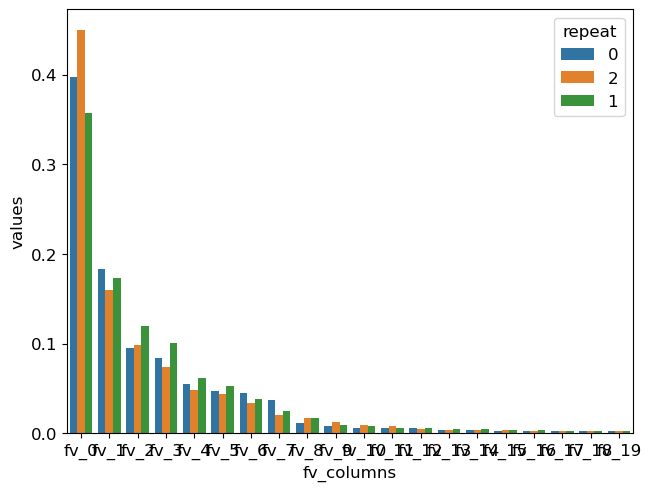

/tmp/ipykernel_1805906/1029628169.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_eda_melted[df_eda_melted['pdb'] == '3UTQ'], x='fv_columns', y='values', hue='repeat', ci=None)


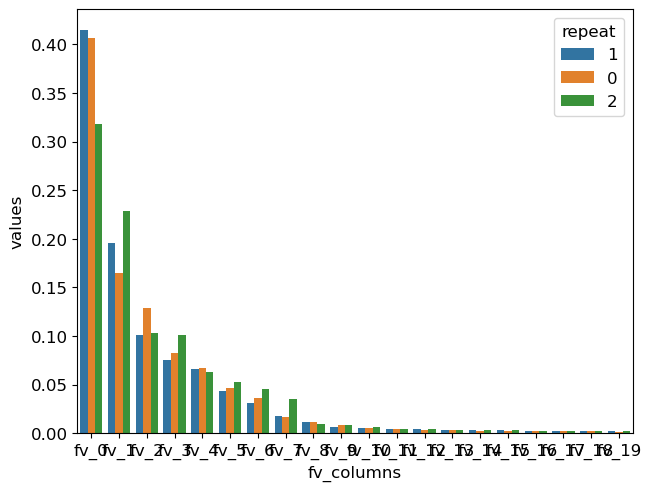

/tmp/ipykernel_1805906/1029628169.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_eda_melted[df_eda_melted['pdb'] == '5N1Y'], x='fv_columns', y='values', hue='repeat', ci=None)


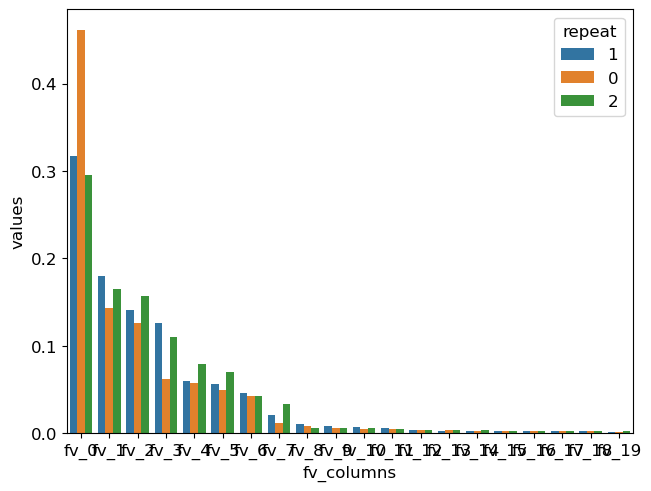

/tmp/ipykernel_1805906/1029628169.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_eda_melted[df_eda_melted['pdb'] == '5C0F'], x='fv_columns', y='values', hue='repeat', ci=None)


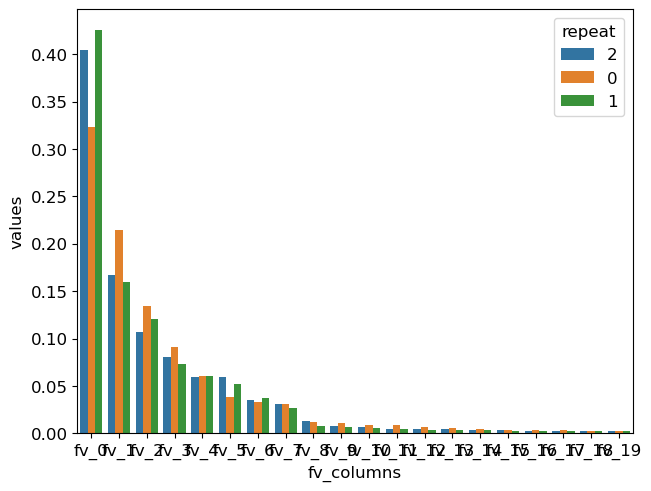

In [109]:
sns.barplot(data=df_eda_melted[df_eda_melted['pdb'] == 'pep_free'], x='fv_columns', y='values', hue='repeat', ci=None)
plt.show()
sns.barplot(data=df_eda_melted[df_eda_melted['pdb'] == '3UTQ'], x='fv_columns', y='values', hue='repeat', ci=None)
plt.show()
sns.barplot(data=df_eda_melted[df_eda_melted['pdb'] == '5N1Y'], x='fv_columns', y='values', hue='repeat', ci=None)
plt.show()
sns.barplot(data=df_eda_melted[df_eda_melted['pdb'] == '5C0F'], x='fv_columns', y='values', hue='repeat', ci=None)
plt.show()

In [110]:
diff_cc_3UTQ_pep_free = mean_cc_dict['3UTQ'] - mean_cc_dict['pep_free']

diff_cc_5N1Y_pep_free = mean_cc_dict['5N1Y'] - mean_cc_dict['pep_free']

diff_cc_5C0F_pep_free = mean_cc_dict['5C0F'] - mean_cc_dict['pep_free']

/home/dilara/miniconda3/envs/mhc_dynamics_dl/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/home/dilara/miniconda3/envs/mhc_dynamics_dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


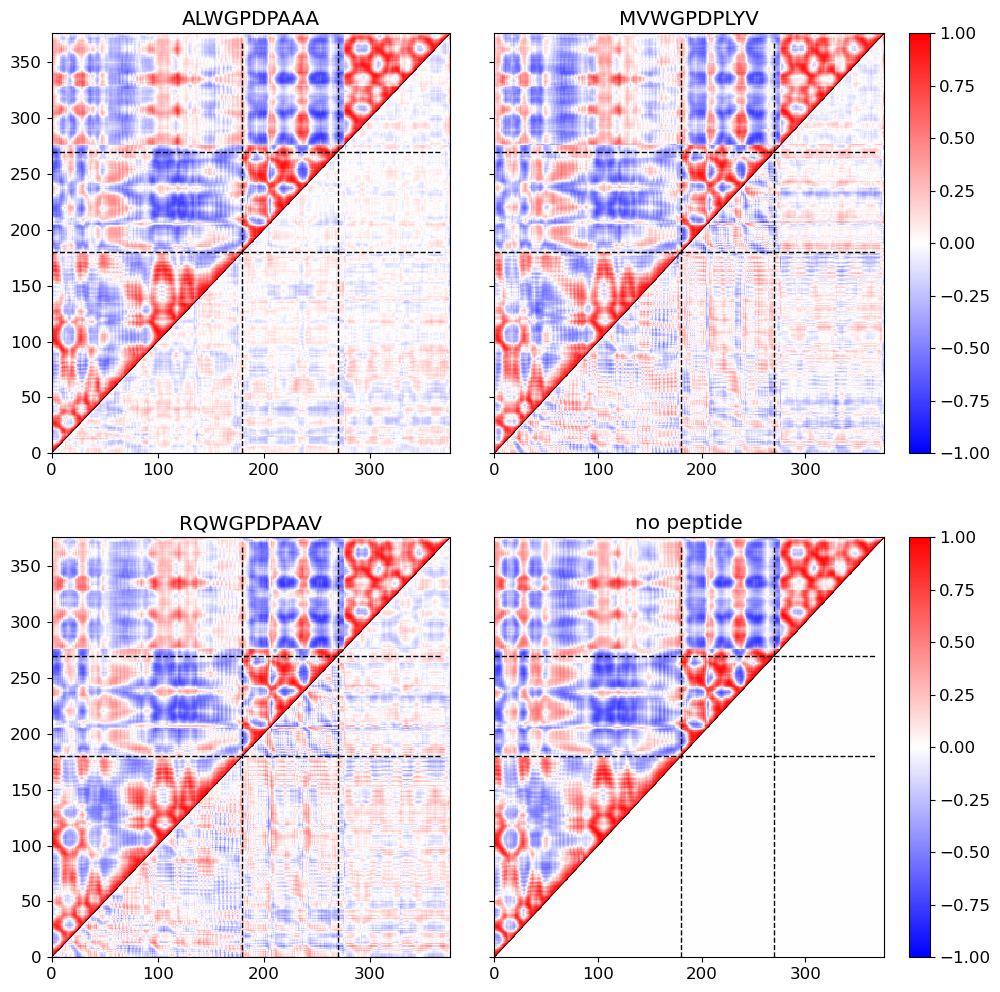

In [111]:
gs = plt.GridSpec(2,2, wspace=0.1, hspace=0.2, width_ratios=[45,55])

fig=plt.figure(figsize=(12,12))

ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1],sharex=ax1)
ax3=fig.add_subplot(gs[1,0],sharex=ax1)
ax4=fig.add_subplot(gs[1,1],sharex=ax1) 

#ax1.pcolor(diff_cc_3UTQ_pep_free,cmap='bwr',vmin=-.7, vmax=.7)
ax1.pcolor(np.triu(mean_cc_dict['3UTQ']).T+np.triu(diff_cc_3UTQ_pep_free),cmap='bwr',vmin=-1, vmax=1)
ax1.plot([0,len(diff_cc_3UTQ_pep_free)],[0,len(diff_cc_3UTQ_pep_free)],linestyle='-',color='black',lw=0.5)
ax1.set_title('ALWGPDPAAA')
im = ax2.pcolor(np.triu(mean_cc_dict['5N1Y']).T+np.triu(diff_cc_5N1Y_pep_free),cmap='bwr',vmin=-1, vmax=1)
ax2.plot([0,len(diff_cc_5N1Y_pep_free)],[0,len(diff_cc_5N1Y_pep_free)],linestyle='-',color='black',lw=0.5)     
ax2.set_yticklabels('')
ax2.set_title('MVWGPDPLYV')
ax3.pcolor(np.triu(mean_cc_dict['5C0F']).T+np.triu(diff_cc_5C0F_pep_free),cmap='bwr',vmin=-1, vmax=1)
ax3.plot([0,len(diff_cc_5C0F_pep_free)],[0,len(diff_cc_5C0F_pep_free)],linestyle='-',color='black',lw=0.5)
ax3.set_title('RQWGPDPAAV')
plt.colorbar(im)
#im = ax4.pcolor(np.triu(mean_cc_dict['5N1Y']).T+np.triu(diff_cc_5N1Y_pep_free),cmap='bwr',vmin=-1, vmax=1)
im = ax4.pcolor(np.zeros((len(diff_cc_5N1Y_pep_free),len(diff_cc_5N1Y_pep_free)))+np.triu(mean_cc_dict['pep_free']).T,cmap='bwr',vmin=-1, vmax=1)
ax4.plot([0,len(diff_cc_5N1Y_pep_free)],[0,len(diff_cc_5N1Y_pep_free)],linestyle='-',color='black',lw=0.5)     
ax4.set_yticklabels('')
ax4.set_title('no peptide')
plt.colorbar(im)

for ax in [ax1, ax2, ax3, ax4]:
    ax.plot([180,180],[0, 368],linestyle='--', color='black',linewidth=1)
    ax.plot([0, 368],[180,180],linestyle='--', color='black',linewidth=1)
    ax.plot([270,270],[0, 368],linestyle='--', color='black',linewidth=1)
    ax.plot([0, 368],[270,270],linestyle='--', color='black',linewidth=1)

In [112]:
def get_df_diffcc(diff_cc, pdb_file):
    syst = parsePDB(pdb_file)
    size_cc = diff_cc.shape[0]

    diff_cc_list = list()

    for i in range(0,size_cc):
        res_i = syst.select(f'resindex {i}')
        resnum_i = res_i.getResnums()[0]
        chain_i = res_i.getChids()[0]

        for j in range(i,size_cc):
            res_j = syst.select(f'resindex {j}')
            resnum_j = res_j.getResnums()[0]
            chain_j = res_j.getChids()[0]

            resnum_chain12 = [str(resnum_i)+chain_i,str(resnum_j)+chain_j]
            resnum_chain12 = natsort.natsorted(resnum_chain12)
            resnum_chain12 = '-'.join(resnum_chain12)
            cc_diff = diff_cc[i][j]
            diff_cc_list.append([i,resnum_i,chain_i,j,resnum_j,chain_j,resnum_chain12,cc_diff])

    df_diffcc = pd.DataFrame(diff_cc_list, columns = ['i','i_resnum','i_chain','j','j_resnum','j_chain','pair','cc_diff'])
    return df_diffcc

In [114]:
df_diffcc_3UTQ = get_df_diffcc(diff_cc_3UTQ_pep_free, "data/palantir_data/3UTQ/backbone.pdb")

@> 1544 atoms and 1 coordinate set(s) were parsed in 0.00s.


In [118]:
df_diffcc_3UTQ

,i,i_resnum,i_chain,j,j_resnum,j_chain,pair,cc_diff
0,0,1,A,0,1,A,1A-1A,0.000000
1,0,1,A,1,2,A,1A-2A,-0.066498
2,0,1,A,2,3,A,1A-3A,-0.115721
3,0,1,A,3,4,A,1A-4A,-0.154304
4,0,1,A,4,5,A,1A-5A,-0.140892
...,...,...,...,...,...,...,...,...
70871,373,98,B,374,99,B,98B-99B,0.052533
70872,373,98,B,375,100,B,98B-100B,0.400754
70873,374,99,B,374,99,B,99B-99B,0.000000
70874,374,99,B,375,100,B,99B-100B,0.238276


In [115]:
df_diffcc_5N1Y = get_df_diffcc(diff_cc_5N1Y_pep_free, "data/palantir_data/5N1Y/backbone.pdb")

@> 1548 atoms and 1 coordinate set(s) were parsed in 0.00s.


In [119]:
df_diffcc_5N1Y

,i,i_resnum,i_chain,j,j_resnum,j_chain,pair,cc_diff
0,0,1,A,0,1,A,1A-1A,0.000000
1,0,1,A,1,2,A,1A-2A,-0.233144
2,0,1,A,2,3,A,1A-3A,-0.248611
3,0,1,A,3,4,A,1A-4A,-0.241998
4,0,1,A,4,5,A,1A-5A,-0.287072
...,...,...,...,...,...,...,...,...
70871,373,97,B,374,98,B,97B-98B,0.006676
70872,373,97,B,375,99,B,97B-99B,0.405061
70873,374,98,B,374,98,B,98B-98B,0.000000
70874,374,98,B,375,99,B,98B-99B,0.259255


In [116]:
df_diffcc_5C0F = get_df_diffcc(diff_cc_5C0F_pep_free, "data/palantir_data/5C0F/backbone.pdb")

@> 1548 atoms and 1 coordinate set(s) were parsed in 0.00s.


In [120]:
df_diffcc_5C0F

,i,i_resnum,i_chain,j,j_resnum,j_chain,pair,cc_diff
0,0,1,A,0,1,A,1A-1A,0.000000e+00
1,0,1,A,1,2,A,1A-2A,-1.957427e-01
2,0,1,A,2,3,A,1A-3A,-2.529097e-01
3,0,1,A,3,4,A,1A-4A,-2.803469e-01
4,0,1,A,4,5,A,1A-5A,-3.084493e-01
...,...,...,...,...,...,...,...,...
70871,373,97,B,374,98,B,97B-98B,5.959808e-02
70872,373,97,B,375,99,B,97B-99B,1.257326e-01
70873,374,98,B,374,98,B,98B-98B,0.000000e+00
70874,374,98,B,375,99,B,98B-99B,6.628463e-02
